See [SciPy Tutorial Section 9.3](http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html)

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
init_printing(use_latex=True)

## Numerical Integration

**Symbolically**

Definite integral value 27.75


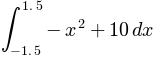

In [2]:
y,x = symbols("y x")
y = 10-x**2
iy = integrate(y)
fiy = lambdify(x,iy)
print "Definite integral value", fiy(1.5)-fiy(-1.5)
Integral(y, (x, -1.5, 1.5))

**Numerically**

In [3]:
from scipy.integrate import quad
quad(lambda x: 10-x**2, -1.5, 1.5)

## Numerical ODEs

** Symbolically**

Initial condition $Y(0)=2$

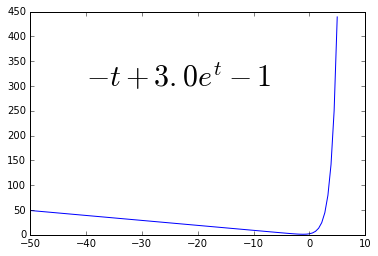

In [4]:
x, t, k, C1,= symbols('x t k C1')
Y = symbols('Y', cls=Function)
dydt = Y(t)+t
yt = dsolve(Eq(Y(t).diff(t) , dydt), Y(t))
eq1 = Eq(yt.rhs.subs({ t:0}).evalf(), 2.)
sol = solve([eq1], [C1])
C1_val = sol[C1]
yt_final = simplify(yt.rhs.subs({C1: C1_val}))
fY = lambdify(t, yt_final, "numpy")
t_vals = np.linspace(-50,5,100)
plt.plot(t_vals, fY(t_vals))
plt.text(-40,300, "$"+latex(yt_final)+"$", size=30)

**Numerically**

Initial condition $Y(0)=2$

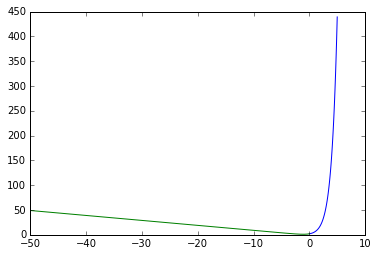

In [6]:
from scipy.integrate import odeint

def f(y, t):
    return [y[0]+t]

y0=[2.]

# From the initial value we need to plot forward ...
t_interval = np.linspace(0, 5, 100)
psoln = odeint(f, y0, t_interval)
plt.plot(t_interval,psoln[:,0])

# ... and backwards
t_interval = np.arange(0,-50,-.1)
psoln = odeint(f, y0, t_interval)
plt.plot(t_interval,psoln[:,0])